# **Classification Model - AtomPairs2DFingerprintCount**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('acetylcholinesterase_dataset_AtomPairs2DFingerprintCount.csv')

In [ ]:
import numpy as np
df = df[np.isfinite(df).all(1)]
df = df.reset_index(drop=True)

In [ ]:
df.head()

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50
0,14.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939
1,15.0,8.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000
2,12.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
3,14.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879
4,7.0,8.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910


In [ ]:
bioactivity_threshold = []
for i in df.pIC50:
  if float(i) <= 5.0:
    bioactivity_threshold.append("Inactive") #inactive
  elif float(i) >= 6.0:
    bioactivity_threshold.append("Active") #active
  else:
    bioactivity_threshold.append("Intermediate") #intermediate

In [ ]:
bioactivity_class = pd.Series(bioactivity_threshold, name='Bio_class')
df = pd.concat([df, bioactivity_class], axis=1)
df

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X,pIC50,Bio_class
0,14.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.124939,Active
1,15.0,8.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,Active
2,12.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030,Inactive
3,14.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.522879,Active
4,7.0,8.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.096910,Active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,29.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.590067,Active
5820,29.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.621602,Active
5821,29.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.387216,Active
5822,32.0,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.200659,Active


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


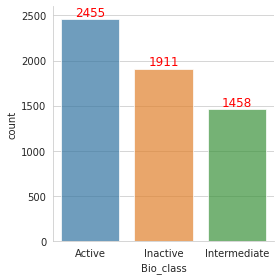

In [ ]:
import math
# Set plotting style
sns.set_style('whitegrid')

# Rounding the integer to the next hundredth value plus an offset of 100
def roundup(x):
    return 100 + int(math.ceil(x / 100.0)) * 100 
sns.factorplot('Bio_class', data=df, kind='count', alpha=0.7, size=4, aspect=1)

# Get current axis on current figure
ax = plt.gca()

# ylim max value to be set
y_max = df['Bio_class'].value_counts().max() 
ax.set_ylim([0, roundup(y_max)])

# Iterate through the list of axes' patches
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=12, color='red', ha='center', va='bottom')


In [ ]:
X = df.drop(['pIC50','Bio_class'], axis=1)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_P,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_Br,APC2D1_C_I,APC2D1_C_B,...,APC2D10_I_I,APC2D10_I_B,APC2D10_I_Si,APC2D10_I_X,APC2D10_B_B,APC2D10_B_Si,APC2D10_B_X,APC2D10_Si_Si,APC2D10_Si_X,APC2D10_X_X
0,14.0,3.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,12.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14.0,8.0,1.0,2.0,0.0,3.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.0,8.0,3.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,29.0,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5820,29.0,9.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5821,29.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5822,32.0,8.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
Y = df.Bio_class
Y

0         Active
1         Active
2       Inactive
3         Active
4         Active
          ...   
5819      Active
5820      Active
5821      Active
5822      Active
5823      Active
Name: Bio_class, Length: 5824, dtype: object

In [ ]:
X.shape

(5824, 780)

In [ ]:
Y.shape

(5824,)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_X,APC2D1_N_N,APC2D1_N_O,APC2D2_C_C,...,APC2D10_C_S,APC2D10_C_F,APC2D10_C_Cl,APC2D10_C_Br,APC2D10_C_X,APC2D10_N_N,APC2D10_N_O,APC2D10_N_X,APC2D10_O_O,APC2D10_O_X
0,14.0,3.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,8.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,19.0,...,0.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
2,12.0,8.0,1.0,2.0,3.0,1.0,4.0,1.0,0.0,17.0,...,0.0,6.0,3.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0
3,14.0,8.0,1.0,2.0,3.0,1.0,4.0,1.0,0.0,20.0,...,0.0,9.0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
4,7.0,8.0,3.0,2.0,3.0,0.0,3.0,1.0,0.0,15.0,...,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,29.0,7.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,36.0,...,1.0,0.0,2.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
5820,29.0,9.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,39.0,...,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
5821,29.0,8.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,37.0,...,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0
5822,32.0,8.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,42.0,...,0.0,0.0,2.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0


In [ ]:
Cols = list(X.columns)

In [ ]:
from sklearn import *
X = preprocessing.normalize(X,norm='l2')
X

array([[0.29281271, 0.06274558, 0.14640635, ..., 0.        , 0.        ,
        0.        ],
       [0.25325701, 0.1350704 , 0.0168838 , ..., 0.        , 0.        ,
        0.        ],
       [0.20528573, 0.13685715, 0.01710714, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.28066853, 0.0774258 , 0.00967823, ..., 0.        , 0.        ,
        0.        ],
       [0.28483011, 0.07120753, 0.01780188, ..., 0.        , 0.        ,
        0.        ],
       [0.27670647, 0.06917662, 0.02594123, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X = pd.DataFrame(X, columns =Cols)
X

,APC2D1_C_C,APC2D1_C_N,APC2D1_C_O,APC2D1_C_S,APC2D1_C_F,APC2D1_C_Cl,APC2D1_C_X,APC2D1_N_N,APC2D1_N_O,APC2D2_C_C,...,APC2D10_C_S,APC2D10_C_F,APC2D10_C_Cl,APC2D10_C_Br,APC2D10_C_X,APC2D10_N_N,APC2D10_N_O,APC2D10_N_X,APC2D10_O_O,APC2D10_O_X
0,0.292813,0.062746,0.146406,0.000000,0.000000,0.000000,0.000000,0.020915,0.0,0.376473,...,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.253257,0.135070,0.016884,0.033768,0.000000,0.016884,0.016884,0.016884,0.0,0.320792,...,0.00000,0.000000,0.050651,0.0,0.050651,0.000000,0.000000,0.0,0.0,0.0
2,0.205286,0.136857,0.017107,0.034214,0.051321,0.017107,0.068429,0.017107,0.0,0.290821,...,0.00000,0.102643,0.051321,0.0,0.153964,0.000000,0.000000,0.0,0.0,0.0
3,0.210723,0.120413,0.015052,0.030103,0.045155,0.015052,0.060207,0.015052,0.0,0.301033,...,0.00000,0.135465,0.045155,0.0,0.180620,0.000000,0.000000,0.0,0.0,0.0
4,0.176608,0.201838,0.075689,0.050459,0.075689,0.000000,0.075689,0.025230,0.0,0.378445,...,0.00000,0.075689,0.000000,0.0,0.075689,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,0.283038,0.068320,0.000000,0.009760,0.000000,0.009760,0.009760,0.009760,0.0,0.351357,...,0.00976,0.000000,0.019520,0.0,0.019520,0.009760,0.000000,0.0,0.0,0.0
5820,0.271610,0.084293,0.018732,0.000000,0.000000,0.009366,0.009366,0.000000,0.0,0.365268,...,0.00000,0.000000,0.018732,0.0,0.018732,0.009366,0.009366,0.0,0.0,0.0
5821,0.280669,0.077426,0.009678,0.000000,0.000000,0.009678,0.009678,0.009678,0.0,0.358094,...,0.00000,0.000000,0.019356,0.0,0.019356,0.009678,0.009678,0.0,0.0,0.0
5822,0.284830,0.071208,0.017802,0.000000,0.000000,0.008901,0.008901,0.000000,0.0,0.373840,...,0.00000,0.000000,0.017802,0.0,0.017802,0.008901,0.008901,0.0,0.0,0.0


In [ ]:
from sklearn.preprocessing import LabelEncoder
Ly = LabelEncoder()
Ly.fit_transform(Y)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
Ly.classes_

array(['Active', 'Inactive', 'Intermediate'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, Y_train.shape

((4659, 130), (4659,))

In [ ]:
X_test.shape, Y_test.shape

((1165, 130), (1165,))

In [ ]:
!pip uninstall scikit-learn -y
!pip install scikit-learn==0.23.1
!pip install PyYAML==5.3.1

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 13.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 22.3 MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=cf7d75fc56d7c89ba909aadb4d153148f686012fea0c2ac5c697959bc83d2666
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0


In [ ]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)

100%|██████████| 29/29 [00:09<00:00,  3.11it/s]


In [ ]:
# Performance table of the training set (80% subset)
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.99,0.99,None,0.99,0.41
LGBMClassifier,0.99,0.99,None,0.99,1.81
DecisionTreeClassifier,0.99,0.99,None,0.99,0.08
ExtraTreeClassifier,0.99,0.99,None,0.99,0.03
ExtraTreesClassifier,0.99,0.99,None,0.99,0.25
LabelPropagation,0.99,0.99,None,0.99,0.11
LabelSpreading,0.99,0.99,None,0.99,0.13
BaggingClassifier,0.98,0.98,None,0.98,0.29
XGBClassifier,0.86,0.85,None,0.86,1.01


In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 29/29 [00:08<00:00,  3.23it/s]


In [ ]:
# Performance table of the test set (20% subset)
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.65,0.61,None,0.63,0.24
RandomForestClassifier,0.64,0.61,None,0.62,0.42
LGBMClassifier,0.62,0.58,None,0.60,1.81
BaggingClassifier,0.56,0.53,None,0.55,0.28
NuSVC,0.57,0.53,None,0.55,0.18
KNeighborsClassifier,0.57,0.53,None,0.55,0.05
XGBClassifier,0.57,0.52,None,0.54,1.01
SVC,0.57,0.52,None,0.54,0.17
RidgeClassifierCV,0.56,0.51,None,0.53,0.05
